# NumPy SSA Solver

### Imports

In [2]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.ssa_solver import NumPySSASolver

### Model Instantiation

Model must include rates, species, and reactions

In [3]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [4]:
model = MichaelisMenten()


### Run Model and plot
Run the model by calling the run function on the model and select solver via 'solver' keyword argument.  Results are returned as a list of dictionaries, where the list index is the trajectory run index, and dictionary keys are comprised of species names and 'time'

In [6]:
%time results = model.run(solver=NumPySSASolver(), show_labels=True)

CPU times: user 162 ms, sys: 4.63 ms, total: 166 ms
Wall time: 176 ms


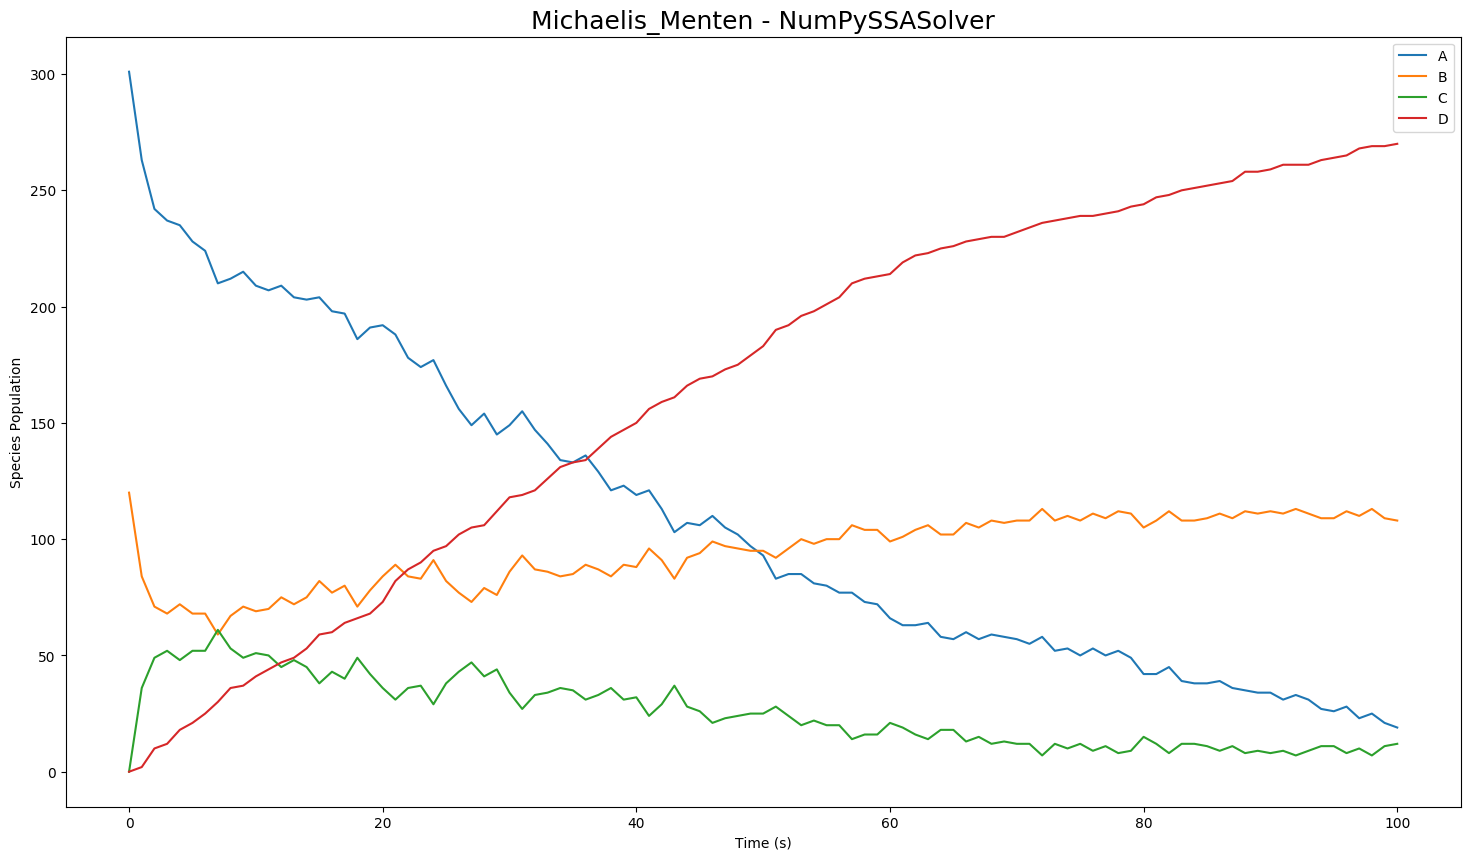

In [7]:
results.plot()

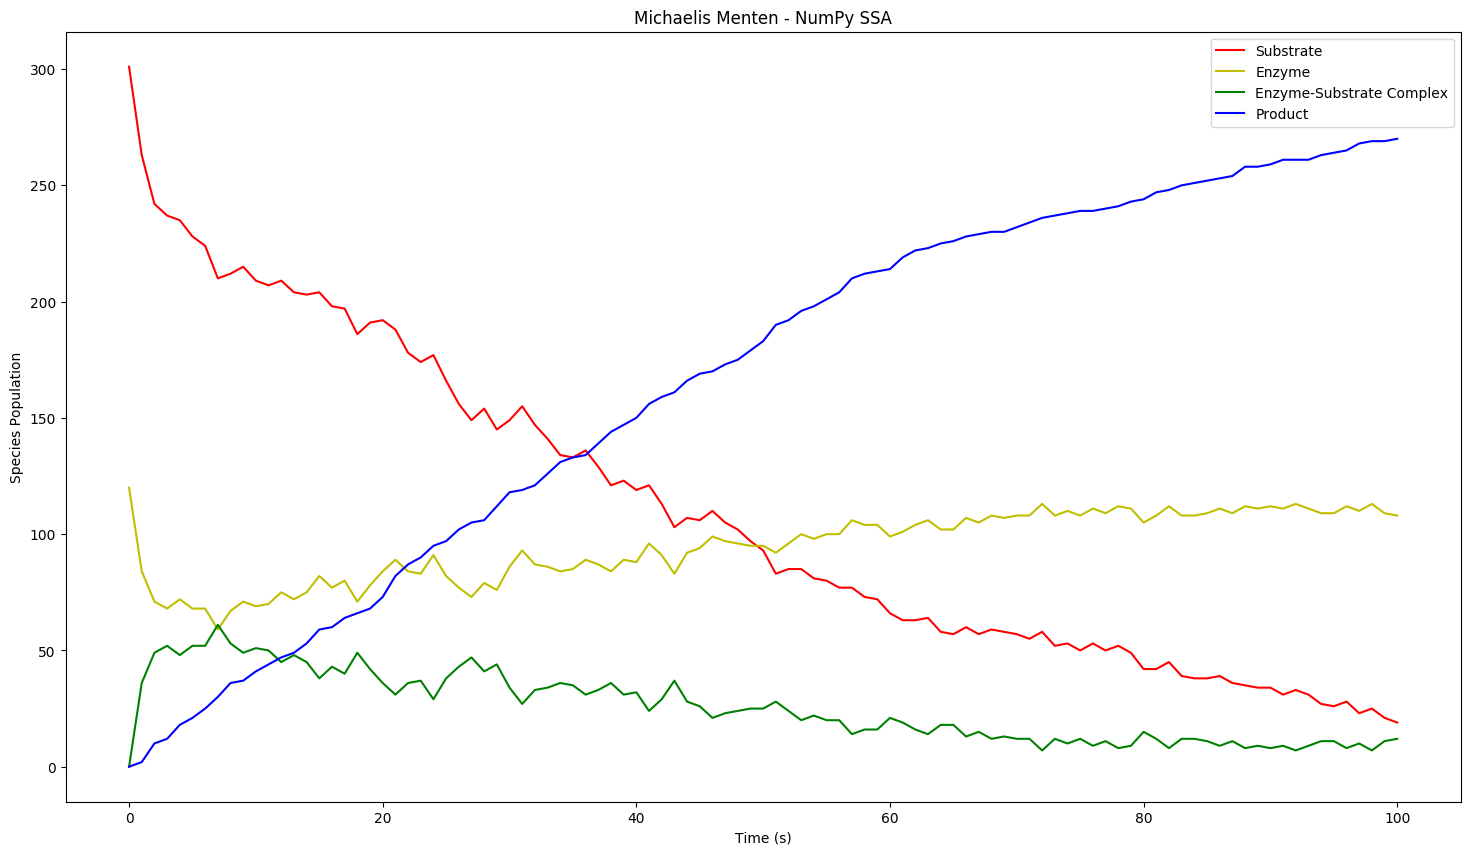

In [8]:
plt.figure(figsize=(18,10))
plt.title("Michaelis Menten - NumPy SSA")
plt.xlabel("Time (s)")
plt.ylabel("Species Population")
plt.plot(results['time'],results['A'],'r', label='Substrate')
plt.plot(results['time'],results['B'],'y', label='Enzyme')
plt.plot(results['time'],results['C'],'g', label='Enzyme-Substrate Complex')
plt.plot(results['time'],results['D'],'b', label='Product')

plt.plot([0],[11])
plt.legend(loc='best')

In [9]:
results.plotplotly()

<script type="text/javascript">
        window.PlotlyConfig = {MathJaxConfig: 'local'};
        if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}
        if (typeof require !== 'undefined') {
        require.undef("plotly");
        requirejs.config({
            paths: {
                'plotly': ['https://cdn.plot.ly/plotly-latest.min']
            }
        });
        require(['plotly'], function(Plotly) {
            window._Plotly = Plotly;
        });
        }
        </script>

<div>
        
        
            <div id="d541a83a-e851-4d2d-8de6-c3e6392ccb84" class="plotly-graph-div" style="height:525px; width:100%;"></div>
            <script type="text/javascript">
                require(["plotly"], function(Plotly) {
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    window.PLOTLYENV.BASE_URL='https://plot.ly';
                    
                if (document.getElementById("d541a83a-e851-4d2d-8de6-c3e6392ccb84")) {
                    Plotly.newPlot(
                        'd541a83a-e851-4d2d-8de6-c3e6392ccb84',
                        [{"mode": "lines", "name": "A", "type": "scatter", "uid": "cf045c26-c17c-4bcf-ba67-ac8ac09c6850", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0], "y": [301.0, 263.0, 242.0, 237.0, 235.0, 228.0, 224.0, 210.0, 212.0, 215.0, 209.0, 207.0, 209.0, 204.0, 203.0, 204.0, 198.0, 197.0, 186.0, 191.0, 192.0, 188.0, 178.0, 174.0, 177.0, 166.0, 156.0, 149.0, 154.0, 145.0, 149.0, 155.0, 147.0, 141.0, 134.0, 133.0, 136.0, 129.0, 121.0, 123.0, 119.0, 121.0, 113.0, 103.0, 107.0, 106.0, 110.0, 105.0, 102.0, 97.0, 93.0, 83.0, 85.0, 85.0, 81.0, 80.0, 77.0, 77.0, 73.0, 72.0, 66.0, 63.0, 63.0, 64.0, 58.0, 57.0, 60.0, 57.0, 59.0, 58.0, 57.0, 55.0, 58.0, 52.0, 53.0, 50.0, 53.0, 50.0, 52.0, 49.0, 42.0, 42.0, 45.0, 39.0, 38.0, 38.0, 39.0, 36.0, 35.0, 34.0, 34.0, 31.0, 33.0, 31.0, 27.0, 26.0, 28.0, 23.0, 25.0, 21.0, 19.0]}, {"mode": "lines", "name": "B", "type": "scatter", "uid": "11400e68-c0af-4822-ab1f-829a136e98a7", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0], "y": [120.0, 84.0, 71.0, 68.0, 72.0, 68.0, 68.0, 59.0, 67.0, 71.0, 69.0, 70.0, 75.0, 72.0, 75.0, 82.0, 77.0, 80.0, 71.0, 78.0, 84.0, 89.0, 84.0, 83.0, 91.0, 82.0, 77.0, 73.0, 79.0, 76.0, 86.0, 93.0, 87.0, 86.0, 84.0, 85.0, 89.0, 87.0, 84.0, 89.0, 88.0, 96.0, 91.0, 83.0, 92.0, 94.0, 99.0, 97.0, 96.0, 95.0, 95.0, 92.0, 96.0, 100.0, 98.0, 100.0, 100.0, 106.0, 104.0, 104.0, 99.0, 101.0, 104.0, 106.0, 102.0, 102.0, 107.0, 105.0, 108.0, 107.0, 108.0, 108.0, 113.0, 108.0, 110.0, 108.0, 111.0, 109.0, 112.0, 111.0, 105.0, 108.0, 112.0, 108.0, 108.0, 109.0, 111.0, 109.0, 112.0, 111.0, 112.0, 111.0, 113.0, 111.0, 109.0, 109.0, 112.0, 110.0, 113.0, 109.0, 108.0]}, {"mode": "lines", "name": "C", "type": "scatter", "uid": "258f1b24-9d86-422c-9116-0fdc6b4e42c0", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0